## TASK 1

In [1]:
import random

# 1) Simulate 1000 coin tosses using a list
tosses = []
for i in range(1000):
    toss = random.choice(["H", "T"])   # H = Heads, T = Tails
    tosses.append(toss)

# 2) Calculate P(Heads) and P(Tails)
P_heads = tosses.count("H") / len(tosses)
P_tails = tosses.count("T") / len(tosses)

# 3) Calculate P(Heads | previous toss was Heads) -> Its meaning is below -
# Among all tosses where the previous toss = Heads, how many times was the current toss also Heads?

count_prev_H = 0
count_H_after_H = 0

for i in range(1, len(tosses)):
    if tosses[i-1] == "H":          # previous toss was Heads  
        count_prev_H += 1
        if tosses[i] == "H":        # current toss is also Heads
            count_H_after_H += 1
# one more thing in this loop is we check if previous is head then only move to inner if condition. If not we ignore inner if and test another.

P_heads_given_heads = count_H_after_H / count_prev_H    # same like formula p(A|B) = p(A n B) / p(B)

# Print results
print("P(Heads):", P_heads)
print("P(Tails):", P_tails)
print("P(Heads | previous was Heads):", P_heads_given_heads)

P(Heads): 0.499
P(Tails): 0.501
P(Heads | previous was Heads): 0.48897795591182364


## TASK 2 

In [2]:
import random

#  first we have to Simulate rolling a 6-sided dice 5,000 times.
rolls = []
for i in range(5000):
    roll = random.randint(1,6)
    rolls.append(roll)

#Find the conditional probability:
# P(roll > 4 | roll is even) meaning -> Among  all rolls where roll is even , how many times the rolls is greater than 4 ?
count_even_roll = 0
count_roll_above_4 = 0
for num in rolls:
    if num % 2 ==0:
        count_even_roll += 1
        if num > 4:
            count_roll_above_4 += 1

p_gt4_given_even_rolls = count_roll_above_4 / count_even_roll   #  same like formula p(A|B) = p(A n B) / p(B)
print(" Probability of roll > 4 | roll is even is ", p_gt4_given_even_rolls)
    

 Probability of roll > 4 | roll is even is  0.3303006329113924


## TASK 3

In [3]:
def bayes_theorem(prior, sensitivity, specificity):
    # prior = P(Disease) = 1% given in question = 0.01
    # sensitivity = P(Test + | Disease) -> meaning If a person HAS the disease, test shows positive 95% of the time.
    # specificity = P(Test - | No Disease) meaning ->If a person HAS the  No disease, test shows negative 95% of the time.

    # P(No Disease)
    prior_not = 1 - prior   # 1 - 0.01

    # False positive rate = 1 - specificity 
    false_positive = 1 - specificity    # 1 - 0.90

    # Bayes formula:
    # P(Disease | Test +) = (sensitivity * prior) /
    #                       (sensitivity*prior + false_positive*prior_not)     

    numerator = sensitivity * prior
    denominator = (sensitivity * prior) + (false_positive * prior_not) # because P(Test +) is not given so we use this P(+)=P(+∣ D)P(D) + P(+∣¬D) P(¬D) 

    return numerator / denominator


# Given values:
prior = 0.01          # 1% disease
sensitivity = 0.95    # true positive rate
specificity = 0.90    # true negative rate

result = bayes_theorem(prior, sensitivity, specificity)
print("P(Disease | Test Positive) =", result)

P(Disease | Test Positive) = 0.08755760368663597


## TASK 4

In [4]:
def bayes_spam(prior_spam, p_free_spam, p_free_not_spam):
    prior_not_spam = 1 - prior_spam
    
    # Total probability of "FREE"
    # P("FREE")=P("FREE"∣ Spam) * P(Spam) + P("FREE"∣ Not Spam) * P(Not Spam)
    p_free = (p_free_spam * prior_spam) + (p_free_not_spam * prior_not_spam)
    
    # Bayes Theorem
    numerator = p_free_spam * prior_spam 
    denominator = p_free
    return numerator / denominator 

# Given values
prior_spam = 0.3
p_free_spam = 0.6
p_free_not_spam = 0.1

result = bayes_spam(prior_spam, p_free_spam, p_free_not_spam)
print("P(Spam | 'FREE') =", result)

P(Spam | 'FREE') = 0.72


## TASK 5 

In [5]:
import random

# You roll two dice.
rolls1 = []
rolls2 = []

# Simulate the game 20,000 times
for i in range(20000):
    roll1 = random.randint(1,6)
    rolls1.append(roll1)
    roll2 = random.randint(1,6)
    rolls2.append(roll2)

win_count = 0
for num1,num2 in zip(rolls1,rolls2):
    if (num1+ num2) == 7 or (num1+ num2) == 11 :   # You win if the sum is 7 or 11.
        win_count += 1    # IT will count number of win
p_wincount = win_count / 20000

print("The probability of winning is ", p_wincount)

    

The probability of winning is  0.2226


## TASK 6

In [6]:
import pandas as pd

# 1. Load the dataset
# putting the dataset that i downloaded from kaggle
df = pd.read_csv("StudentsPerformance.csv")

# 2. Create a simple "Passed" column (for example: pass if average of scores ≥ 60)
df["average_score"] = df[["math score", "reading score", "writing score"]].mean(axis=1)  # i use axis =1 because its denote for columns
df["passed"] = df["average_score"] >= 60   # this gives True/False

# 3. Compute P(Male | Passed)
# Using value_counts instead of filtering twice
counts = df[df["passed"] == True]["gender"].value_counts()
p_male_given_pass = counts["male"] / counts.sum()
print("P(male | passed) =", p_male_given_pass)

# 4. Also compute P(passed | male)
counts2 = df[df["gender"] == "male"]["passed"].value_counts()
p_pass_given_male = counts2[True] / counts2.sum()
print("P(passed | male)  =", p_pass_given_male)

P(male | passed) = 0.4489510489510489
P(passed | male)  = 0.6659751037344398


In [7]:
# calculating no of rows and cols 
df.shape

(1000, 10)

In [8]:
# first 5 rows
df.head(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average_score,passed
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667,True
1,female,group C,some college,standard,completed,69,90,88,82.333333,True
2,female,group B,master's degree,standard,none,90,95,93,92.666667,True
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333,False
4,male,group C,some college,standard,none,76,78,75,76.333333,True


## TASK 7

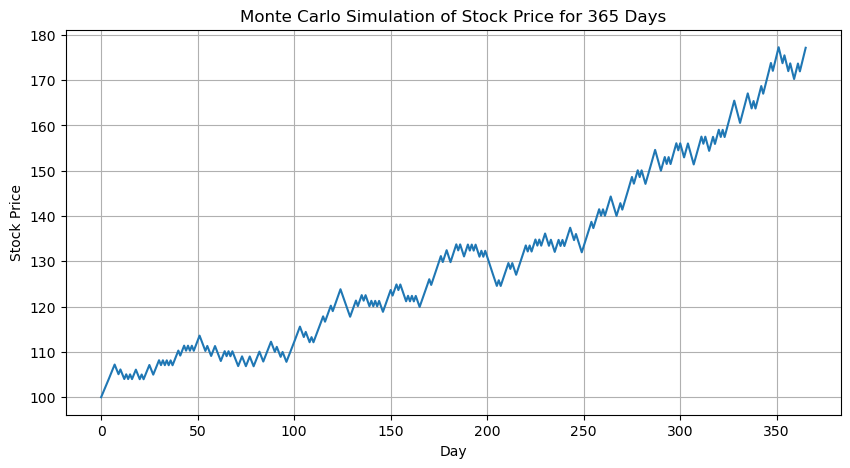

In [9]:
import random
import matplotlib.pyplot as plt

# Start price
price = 100
prices = [price]

# Simulate 365 days
for i in range(365):
    r = random.random()   # gives value between 0 and 1
    
    if r < 0.6:           # 60% chance
        price = price * 1.01   # +1%
    else:                 # 40% chance
        price = price * 0.99   # -1%
    
    prices.append(price)

# Plot the price movement
plt.figure(figsize=(10,5))
plt.plot(prices)
plt.title("Monte Carlo Simulation of Stock Price for 365 Days")
plt.xlabel("Day")
plt.ylabel("Stock Price")
plt.grid(True)
plt.show()

## TASK 8 

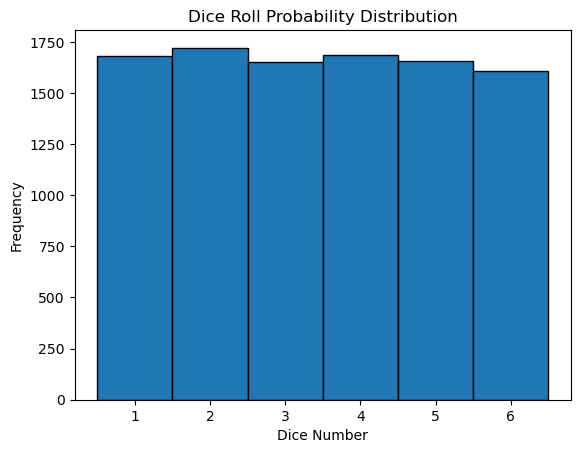

In [10]:
import random
import matplotlib.pyplot as plt

# 1. Simulate 10,000 dice rolls
rolls = [random.randint(1,6) for _ in range(10000)]

# 2. Plot histogram
plt.hist(rolls, bins=range(1,8), edgecolor='black', align='left')  # bins 1-6
plt.title("Dice Roll Probability Distribution")
plt.xlabel("Dice Number")
plt.ylabel("Frequency")
plt.xticks(range(1,7))  # show numbers 1-6 on x-axis
plt.show()